In [151]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)
plt.style.use('seaborn-v0_8-darkgrid')

In [ ]:
print("\nLOAD DỮ LIỆU ĐÃ LÀM SẠCH")

df = pd.read_csv('../data/processed/cleaned_data.csv')
print(f"Đã load dữ liệu: {df.shape[0]:,} dòng, {df.shape[1]} cột")
print(f"Các cột: {df.columns.tolist()}")


LOAD DỮ LIỆU ĐÃ LÀM SẠCH
Đã load dữ liệu: 75,898 dòng, 11 cột
Các cột: ['job_title', 'job_type', 'position_level', 'city', 'experience', 'skills', 'job_fields', 'salary', 'salary_min', 'salary_max', 'unit']


# TẠO BIẾN MỚI SALARY_AVG_VND

In [153]:
# Tạo salary_avg
df['salary_avg_vnd'] = (df['salary_min'] + df['salary_max']) / 2
print(f"Đã tạo cột salary_avg_vnd")

Đã tạo cột salary_avg_vnd


In [154]:
df.head()

,job_title,job_type,position_level,city,experience,skills,job_fields,salary,salary_min,salary_max,unit,salary_avg_vnd
0,nhân viên qc ngành cơ khí,nhân viên chính thức,Nhân viên,Hồ Chí Minh,1-2 năm,"production planning staff, chuyên viên iso, th...","vận hành sản xuất, sản xuất, qc), quản lý chất...",8 tr - 11 tr vnd,8.0,11.0,VND,9.50
1,trưởng phòng đấu thầu,nhân viên chính thức,Trưởng nhóm,Hồ Chí Minh,5-7 năm,"trưởng phòng xây dựng, trưởng phòng đấu thầu, ...","điện, xây dựng, điện tử, điện lạnh, dầu khí, đ...",20 tr - 30 tr vnd,20.0,30.0,VND,25.00
2,home textile designer,nhân viên chính thức,Nhân viên,Hưng Yên,5-15 năm,Không yêu cầu,"dệt may, nghệ thuật, da giày, thiết kế, mỹ thu...","800 - 1,500 usd",20.0,37.5,USD,28.75
3,giám đốc kinh doanh khu vực kem dẻo thổ nhĩ kỳ...,nhân viên chính thức,Quản lý,Bình Định,2-5 năm,"sales director, giám đốc kinh doanh khu vực ke...","thực phẩm & đồ uống, bán sỉ, bán lẻ, kinh doan...",15 tr - 40 tr vnd,15.0,40.0,VND,27.50
4,kỹ thuật viên ie,nhân viên chính thức,Nhân viên,Hà Nam,Không yêu cầu,kỹ thuật viên ie tiếng trung,"vận hành sản xuất, sản xuất",10 tr - 18 tr vnd,10.0,18.0,VND,14.00


In [155]:
# Thống kê
print(f"\nThống kê salary_avg_vnd:")
print(f"   - Min: {df['salary_avg_vnd'].min():,.0f}tr VND")
print(f"   - Max: {df['salary_avg_vnd'].max():,.0f}tr VND")
print(f"   - Mean: {df['salary_avg_vnd'].mean():,.0f}tr VND")
print(f"   - Median: {df['salary_avg_vnd'].median():,.0f}tr VND")


Thống kê salary_avg_vnd:
   - Min: 1tr VND
   - Max: 38tr VND
   - Mean: 14tr VND
   - Median: 13tr VND


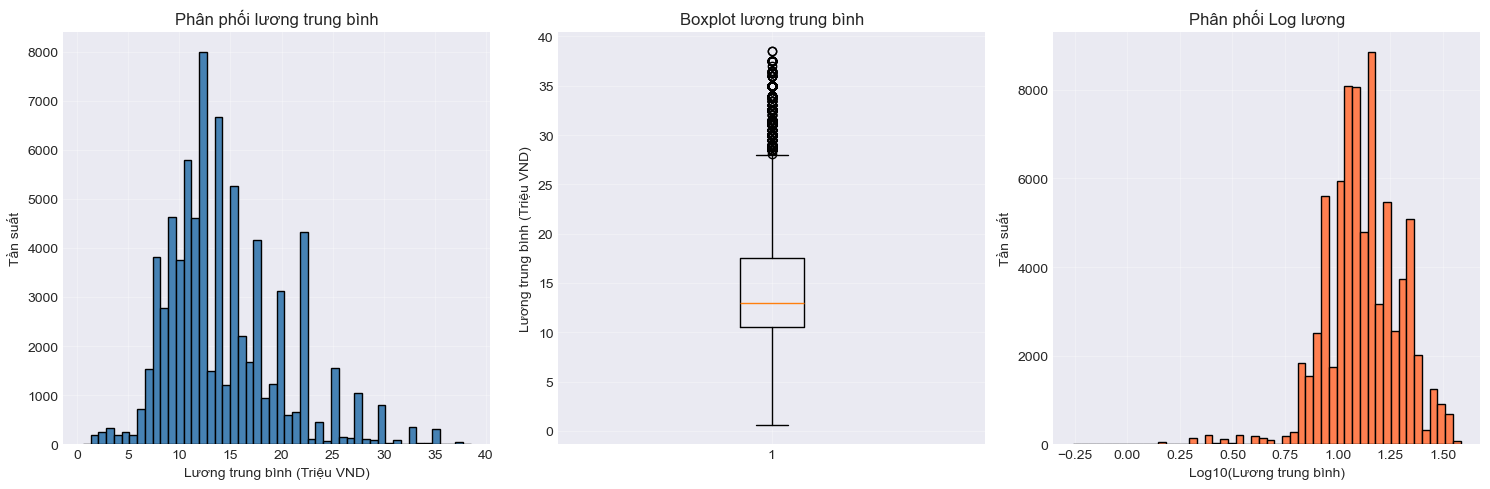


Đã lưu biểu đồ phân phối lương!


In [ ]:
# Visualization
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.hist(df['salary_avg_vnd'], bins=50, color='steelblue', edgecolor='black')
plt.xlabel('Lương trung bình (Triệu VND)')
plt.ylabel('Tần suất')
plt.title('Phân phối lương trung bình')
plt.grid(True, alpha=0.3)

plt.subplot(1, 3, 2)
plt.boxplot(df['salary_avg_vnd'], vert=True)
plt.ylabel('Lương trung bình (Triệu VND)')
plt.title('Boxplot lương trung bình')
plt.grid(True, alpha=0.3)

plt.subplot(1, 3, 3)
plt.hist(np.log10(df['salary_avg_vnd']), bins=50, color='coral', edgecolor='black')
plt.xlabel('Log10(Lương trung bình)')
plt.ylabel('Tần suất')
plt.title('Phân phối Log lương')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('./figures/03_salary_avg_distribution.png', dpi=300, bbox_inches='tight')
plt.show()
print("\nĐã lưu biểu đồ phân phối lương!")

# TẠO BIẾN PHÂN LOẠI LƯƠNG - SALARY_CATEGORY

In [157]:
# Phân loại lương dựa trên quantile
quantiles = df['salary_avg_vnd'].quantile([0.25, 0.5, 0.75])
print(f"Quantiles:")
print(f"   - 25%: {quantiles[0.25]:,.0f}tr VND")
print(f"   - 50%: {quantiles[0.5]:,.0f}tr VND")
print(f"   - 75%: {quantiles[0.75]:,.0f}tr VND")

def categorize_salary(salary):
    if salary < quantiles[0.25]:
        return 'Thấp'
    elif salary < quantiles[0.5]:
        return 'Trung bình thấp'
    elif salary < quantiles[0.75]:
        return 'Trung bình cao'
    else:
        return 'Cao'

df['salary_category'] = df['salary_avg_vnd'].apply(categorize_salary)
print(f"\nĐã tạo cột salary_category")

Quantiles:
   - 25%: 10tr VND
   - 50%: 13tr VND
   - 75%: 18tr VND

Đã tạo cột salary_category


In [158]:
df.head()

,job_title,job_type,position_level,city,experience,skills,job_fields,salary,salary_min,salary_max,unit,salary_avg_vnd,salary_category
0,nhân viên qc ngành cơ khí,nhân viên chính thức,Nhân viên,Hồ Chí Minh,1-2 năm,"production planning staff, chuyên viên iso, th...","vận hành sản xuất, sản xuất, qc), quản lý chất...",8 tr - 11 tr vnd,8.0,11.0,VND,9.50,Thấp
1,trưởng phòng đấu thầu,nhân viên chính thức,Trưởng nhóm,Hồ Chí Minh,5-7 năm,"trưởng phòng xây dựng, trưởng phòng đấu thầu, ...","điện, xây dựng, điện tử, điện lạnh, dầu khí, đ...",20 tr - 30 tr vnd,20.0,30.0,VND,25.00,Cao
2,home textile designer,nhân viên chính thức,Nhân viên,Hưng Yên,5-15 năm,Không yêu cầu,"dệt may, nghệ thuật, da giày, thiết kế, mỹ thu...","800 - 1,500 usd",20.0,37.5,USD,28.75,Cao
3,giám đốc kinh doanh khu vực kem dẻo thổ nhĩ kỳ...,nhân viên chính thức,Quản lý,Bình Định,2-5 năm,"sales director, giám đốc kinh doanh khu vực ke...","thực phẩm & đồ uống, bán sỉ, bán lẻ, kinh doan...",15 tr - 40 tr vnd,15.0,40.0,VND,27.50,Cao
4,kỹ thuật viên ie,nhân viên chính thức,Nhân viên,Hà Nam,Không yêu cầu,kỹ thuật viên ie tiếng trung,"vận hành sản xuất, sản xuất",10 tr - 18 tr vnd,10.0,18.0,VND,14.00,Trung bình cao


In [159]:
# Thống kê
print(f"\nPhân bố salary_category:")
print(df['salary_category'].value_counts())
print(f"\nPhân bố % salary_category:")
print(df['salary_category'].value_counts(normalize=True) * 100)


Phân bố salary_category:
salary_category
Cao                20404
Thấp               18601
Trung bình cao     18494
Trung bình thấp    18399
Name: count, dtype: int64

Phân bố % salary_category:
salary_category
Cao                26.883449
Thấp               24.507892
Trung bình cao     24.366913
Trung bình thấp    24.241746
Name: proportion, dtype: float64


# XỬ LÝ BIẾN EXPERIENCE - CHUYỂN SANG SỐ NĂM

In [160]:
print(f"Các giá trị unique của experience:")
print(df['experience'].value_counts())

Các giá trị unique của experience:
experience
Không yêu cầu    33540
1-2 năm          14873
2-3 năm           6371
Dưới 1 năm        3935
2-5 năm           3193
                 ...  
4-12 năm             1
3-30 năm             1
8-20 năm             1
4-15 năm             1
1-4                  1
Name: count, Length: 71, dtype: int64


In [161]:

# Mapping experience sang số năm (lấy giá trị trung bình của khoảng)
experience_to_years = {
    'Không yêu cầu': 0, 
    '1-2 năm': 1.5,
    '2-3 năm': 2.5,
    'Dưới 1 năm': 0.5, 
    '2-5 năm': 3.5, 
    '1-3 năm': 2, 
    '1-5 năm': 3, 
    '3-5 năm': 4,
    '3-4 năm': 3.5,
    '5-6 năm': 5.5, 
    '2-4 năm': 3, 
    '4-5 năm': 4.5,
    '5-10 năm': 7.5, 
    '2-10 năm': 6, 
    '5-7 năm': 6, 
    '3-10 năm': 6.5, 
    '1-10 năm': 5.5,
    '3-7 năm': 5, 
    '1-4 năm': 2.5, 
    '5-8 năm': 6.5, 
    '2-7 năm': 4.5, 
    '2-8 năm': 5, 
    '4-6 năm': 5, 
    '5-15 năm': 10, 
    '6-7 năm': 6.5, 
    '2-15 năm': 8.5, 
    'Trên 10 năm': 10.5, 
    '3-15 năm': 9, 
    '2-6 năm': 4, 
    '1-8 năm': 4.5, 
    '3-8 năm': 5.5, 
    '1-7 năm': 4, 
    '4-10 năm': 7, 
    '3-6 năm': 4.5, 
    '5-20 năm': 12.5, 
    '1-15 năm': 8, 
    '7-8 năm': 7.5, 
    '3-20 năm': 11.5, 
    '3-9 năm': 5.5,
    '8-10 năm': 9, 
    '4-7 năm': 5.5, 
    '8-15 năm': 11.5, 
    '2-20 năm': 11, 
    '7-10 năm': 8.5, 
    '4-8 năm': 6, 
    '1-6 năm': 3.5, 
    '2-25 năm': 13.5, 
    '5-25 năm': 15,
    '8-9 năm': 8.5,
    '1-12 năm': 6.5,
    '1-9 năm': 5,
    '1-11 năm': 6,
    '2-14 năm': 8, 
    '9-10 năm': 9.5, 
    '7-15 năm': 12.5,
    '6-8 năm': 7,
    '7-12 năm': 9.5, 
    '7-20 năm': 13.5,
    '3-12 năm': 7.5,
    '6-10 năm': 8,
    '4-20 năm': 12, 
    '1-20 năm': 10.5, 
    '3-17 năm': 10,
    '4-9 năm': 6.5,
    '7-13 năm': 10, 
    '6-11 năm': 8.5,
    '4-12 năm': 8,
    '3-30 năm': 16.5,
    '8-20 năm': 14,
    '4-15 năm': 9.5,
    '1-4': 2.5
}

df['experience_years'] = df['experience'].map(experience_to_years)
print(f"\nĐã tạo cột experience_years")


Đã tạo cột experience_years


In [162]:
df.head()

,job_title,job_type,position_level,city,experience,skills,job_fields,salary,salary_min,salary_max,unit,salary_avg_vnd,salary_category,experience_years
0,nhân viên qc ngành cơ khí,nhân viên chính thức,Nhân viên,Hồ Chí Minh,1-2 năm,"production planning staff, chuyên viên iso, th...","vận hành sản xuất, sản xuất, qc), quản lý chất...",8 tr - 11 tr vnd,8.0,11.0,VND,9.50,Thấp,1.5
1,trưởng phòng đấu thầu,nhân viên chính thức,Trưởng nhóm,Hồ Chí Minh,5-7 năm,"trưởng phòng xây dựng, trưởng phòng đấu thầu, ...","điện, xây dựng, điện tử, điện lạnh, dầu khí, đ...",20 tr - 30 tr vnd,20.0,30.0,VND,25.00,Cao,6.0
2,home textile designer,nhân viên chính thức,Nhân viên,Hưng Yên,5-15 năm,Không yêu cầu,"dệt may, nghệ thuật, da giày, thiết kế, mỹ thu...","800 - 1,500 usd",20.0,37.5,USD,28.75,Cao,10.0
3,giám đốc kinh doanh khu vực kem dẻo thổ nhĩ kỳ...,nhân viên chính thức,Quản lý,Bình Định,2-5 năm,"sales director, giám đốc kinh doanh khu vực ke...","thực phẩm & đồ uống, bán sỉ, bán lẻ, kinh doan...",15 tr - 40 tr vnd,15.0,40.0,VND,27.50,Cao,3.5
4,kỹ thuật viên ie,nhân viên chính thức,Nhân viên,Hà Nam,Không yêu cầu,kỹ thuật viên ie tiếng trung,"vận hành sản xuất, sản xuất",10 tr - 18 tr vnd,10.0,18.0,VND,14.00,Trung bình cao,0.0


In [163]:
# Kiểm tra mapping
print(f"\nMapping experience -> experience_years:")
for exp, years in experience_to_years.items():
    count = len(df[df['experience'] == exp])
    print(f"   {exp:20s} -> {years:5.1f} năm ({count:6,} dòng)")


Mapping experience -> experience_years:
   Không yêu cầu        ->   0.0 năm (33,540 dòng)
   1-2 năm              ->   1.5 năm (14,873 dòng)
   2-3 năm              ->   2.5 năm ( 6,371 dòng)
   Dưới 1 năm           ->   0.5 năm ( 3,935 dòng)
   2-5 năm              ->   3.5 năm ( 3,193 dòng)
   1-3 năm              ->   2.0 năm ( 3,154 dòng)
   1-5 năm              ->   3.0 năm ( 3,000 dòng)
   3-5 năm              ->   4.0 năm ( 2,520 dòng)
   3-4 năm              ->   3.5 năm ( 2,122 dòng)
   5-6 năm              ->   5.5 năm (   667 dòng)
   2-4 năm              ->   3.0 năm (   306 dòng)
   4-5 năm              ->   4.5 năm (   273 dòng)
   5-10 năm             ->   7.5 năm (   261 dòng)
   2-10 năm             ->   6.0 năm (   198 dòng)
   5-7 năm              ->   6.0 năm (   196 dòng)
   3-10 năm             ->   6.5 năm (   177 dòng)
   1-10 năm             ->   5.5 năm (   140 dòng)
   3-7 năm              ->   5.0 năm (   100 dòng)
   1-4 năm              ->   2.5 năm (   

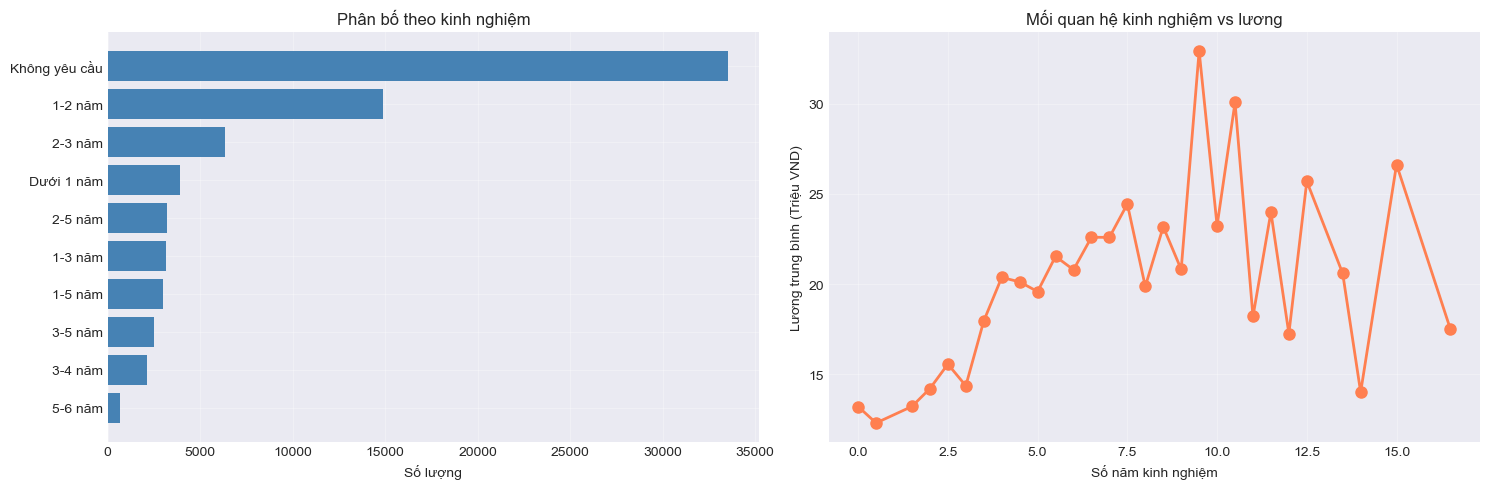


Đã lưu biểu đồ phân tích kinh nghiệm!


In [ ]:
# Visualization
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Phân bố experience (lấy top 10)
exp_counts = df['experience'].value_counts().head(10)
axes[0].barh(exp_counts.index, exp_counts.values, color='steelblue')
axes[0].set_xlabel('Số lượng')
axes[0].set_title('Phân bố theo kinh nghiệm')
axes[0].grid(True, alpha=0.3)

# Quan hệ experience vs salary
exp_salary = df.groupby('experience_years')['salary_avg_vnd'].mean().sort_index()
axes[1].plot(exp_salary.index, exp_salary.values, marker='o', linewidth=2, markersize=8, color='coral')
axes[1].set_xlabel('Số năm kinh nghiệm')
axes[1].set_ylabel('Lương trung bình (Triệu VND)')
axes[1].set_title('Mối quan hệ kinh nghiệm vs lương')
axes[1].grid(True, alpha=0.3)
axes[0].invert_yaxis()

plt.tight_layout()
plt.savefig('./figures/03_experience_analysis.png', dpi=300, bbox_inches='tight')
plt.show()
print("\nĐã lưu biểu đồ phân tích kinh nghiệm!")

# XỬ LÝ BIẾN SKILLS

In [165]:
# Đếm số lượng kỹ năng
df['skills_count'] = df['skills'].apply(lambda x: len(str(x).split(',')) if pd.notna(x) else 0)
print(f"Đã tạo cột skills_count")

print(f"\nThống kê skills_count:")
print(f"   - Min: {df['skills_count'].min()}")
print(f"   - Max: {df['skills_count'].max()}")
print(f"   - Mean: {df['skills_count'].mean():.2f}")
print(f"   - Median: {df['skills_count'].median()}")

Đã tạo cột skills_count

Thống kê skills_count:
   - Min: 1
   - Max: 29
   - Mean: 3.17
   - Median: 3.0


In [166]:
# Trích xuất skills phổ biến nhất
print(f"\nkỹ năng phổ biến nhất:")

all_skills = []
for skills in df['skills'].dropna():
    skills_list = [s.strip() for s in str(skills).split(',')]
    all_skills.extend(skills_list)

skills_series = pd.Series(all_skills)
top_skills = skills_series.value_counts().head(20)
print(top_skills)



kỹ năng phổ biến nhất:
tư vấn bán hàng                       10156
Không yêu cầu                         10146
chăm sóc khách hàng                    8750
bán hàng kinh doanh                    6843
bán sỉ bán lẻ quản lý cửa hàng         3800
phát triển thị trường                  2546
bán hàng qua điện thoại (telesale)     2338
kế toán tổng hợp                       2330
hành chính văn phòng                   2260
xây dựng                               1873
kiểm toán                              1808
kế toán                                1550
hành chính thư ký                      1532
nhân viên kinh doanh                   1467
tài chính đầu tư chứng khoán           1459
cơ khí                                 1453
khoa học kỹ thuật                      1449
salesman                               1355
xử lý nợ                               1309
đại diện bán hàng                      1294
Name: count, dtype: int64


In [167]:
# Tạo binary features cho top skills
print(f"\nTạo binary features:")
for i, skill in enumerate(top_skills.head(10).index, 1):
    col_name = f'has_skill_{skill.lower().replace(" ", "_")}'
    df[col_name] = df['skills'].apply(lambda x: 1 if skill.lower() in str(x).lower() else 0)
    count = df[col_name].sum()
    print(f"   {i:2d}. {col_name:30s}: {count:6,} dòng ({count/len(df)*100:5.2f}%)")


Tạo binary features:
    1. has_skill_tư_vấn_bán_hàng     : 10,313 dòng (13.59%)
    2. has_skill_không_yêu_cầu       : 10,559 dòng (13.91%)
    3. has_skill_chăm_sóc_khách_hàng :  9,452 dòng (12.45%)
    4. has_skill_bán_hàng_kinh_doanh :  6,843 dòng ( 9.02%)
    5. has_skill_bán_sỉ_bán_lẻ_quản_lý_cửa_hàng:  3,800 dòng ( 5.01%)
    6. has_skill_phát_triển_thị_trường:  2,635 dòng ( 3.47%)
    7. has_skill_bán_hàng_qua_điện_thoại_(telesale):  2,338 dòng ( 3.08%)
    8. has_skill_kế_toán_tổng_hợp    :  2,423 dòng ( 3.19%)
    9. has_skill_hành_chính_văn_phòng:  2,355 dòng ( 3.10%)
   10. has_skill_xây_dựng            :  2,398 dòng ( 3.16%)


# XỬ LÝ BIẾN JOB_FIELDS

In [ ]:
# Đếm số lượng lĩnh vực
df['fields_count'] = df['job_fields'].apply(lambda x: len(str(x).split(',')) if pd.notna(x) else 0)
print(f"Đã tạo cột fields_count")

✓ Đã tạo cột fields_count


In [169]:
df.head()

,job_title,job_type,position_level,city,experience,skills,job_fields,salary,salary_min,salary_max,unit,salary_avg_vnd,salary_category,experience_years,skills_count,has_skill_tư_vấn_bán_hàng,has_skill_không_yêu_cầu,has_skill_chăm_sóc_khách_hàng,has_skill_bán_hàng_kinh_doanh,has_skill_bán_sỉ_bán_lẻ_quản_lý_cửa_hàng,has_skill_phát_triển_thị_trường,has_skill_bán_hàng_qua_điện_thoại_(telesale),has_skill_kế_toán_tổng_hợp,has_skill_hành_chính_văn_phòng,has_skill_xây_dựng,fields_count
0,nhân viên qc ngành cơ khí,nhân viên chính thức,Nhân viên,Hồ Chí Minh,1-2 năm,"production planning staff, chuyên viên iso, th...","vận hành sản xuất, sản xuất, qc), quản lý chất...",8 tr - 11 tr vnd,8.0,11.0,VND,9.50,Thấp,1.5,9,0,0,0,0,0,0,0,0,0,0,4
1,trưởng phòng đấu thầu,nhân viên chính thức,Trưởng nhóm,Hồ Chí Minh,5-7 năm,"trưởng phòng xây dựng, trưởng phòng đấu thầu, ...","điện, xây dựng, điện tử, điện lạnh, dầu khí, đ...",20 tr - 30 tr vnd,20.0,30.0,VND,25.00,Cao,6.0,5,0,0,0,0,0,0,0,0,0,1,6
2,home textile designer,nhân viên chính thức,Nhân viên,Hưng Yên,5-15 năm,Không yêu cầu,"dệt may, nghệ thuật, da giày, thiết kế, mỹ thu...","800 - 1,500 usd",20.0,37.5,USD,28.75,Cao,10.0,1,0,1,0,0,0,0,0,0,0,0,8
3,giám đốc kinh doanh khu vực kem dẻo thổ nhĩ kỳ...,nhân viên chính thức,Quản lý,Bình Định,2-5 năm,"sales director, giám đốc kinh doanh khu vực ke...","thực phẩm & đồ uống, bán sỉ, bán lẻ, kinh doan...",15 tr - 40 tr vnd,15.0,40.0,VND,27.50,Cao,3.5,7,0,0,0,0,0,0,0,0,0,0,5
4,kỹ thuật viên ie,nhân viên chính thức,Nhân viên,Hà Nam,Không yêu cầu,kỹ thuật viên ie tiếng trung,"vận hành sản xuất, sản xuất",10 tr - 18 tr vnd,10.0,18.0,VND,14.00,Trung bình cao,0.0,1,0,0,0,0,0,0,0,0,0,0,2


In [170]:
# Trích xuất top fields
print(f"\nTop 15 lĩnh vực phổ biến nhất:")

all_fields = []
for fields in df['job_fields'].dropna():
    fields_list = [f.strip() for f in str(fields).split(',')]
    all_fields.extend(fields_list)

fields_series = pd.Series(all_fields)
top_fields = fields_series.value_counts().head(15)
print(top_fields)


Top 15 lĩnh vực phổ biến nhất:
kinh doanh               21697
bán hàng                 21697
chăm sóc khách hàng      11345
marketing                 7525
ngân hàng                 7407
bán hàng - kinh doanh     6811
Chưa phân loại            6485
kế toán                   6387
tài chính                 6385
kiểm toán                 5852
hành chính                5442
bán lẻ                    5037
bán sỉ                    5037
xây dựng                  4871
sản xuất                  4045
Name: count, dtype: int64


In [171]:
# Tạo binary features cho top fields
print(f"\nTạo binary features cho top 10 fields:")
for i, field in enumerate(top_fields.head(10).index, 1):
    col_name = f'field_{field.lower().replace(" ", "_").replace("/", "_")}'
    df[col_name] = df['job_fields'].apply(lambda x: 1 if field.lower() in str(x).lower() else 0)
    count = df[col_name].sum()
    print(f"   {i:2d}. {col_name:30s}: {count:6,} dòng ({count/len(df)*100:5.2f}%)")


Tạo binary features cho top 10 fields:
    1. field_kinh_doanh              : 28,508 dòng (37.56%)
    2. field_bán_hàng                : 28,528 dòng (37.59%)
    3. field_chăm_sóc_khách_hàng     : 11,345 dòng (14.95%)
    4. field_marketing               :  7,525 dòng ( 9.91%)
    5. field_ngân_hàng               :  7,407 dòng ( 9.76%)
    6. field_bán_hàng_-_kinh_doanh   :  6,811 dòng ( 8.97%)
    7. field_chưa_phân_loại          :  6,485 dòng ( 8.54%)
    8. field_kế_toán                 :  6,387 dòng ( 8.42%)
    9. field_tài_chính               :  7,843 dòng (10.33%)
   10. field_kiểm_toán               :  5,852 dòng ( 7.71%)


# MÃ HÓA BIẾN PHÂN LOẠI - ENCODING

# Label Encoding cho position_level

In [172]:
print("\nLabel Encoding cho position_level:")
position_order = ['Chưa cập nhật','Cộng tác viên','Thực tập sinh', 'Nhân viên','Chuyên gia', 'Trưởng nhóm','Trưởng phòng', 'Quản lý', 'Phó giám đốc', 'Giám đốc']
position_mapping = {pos: i for i, pos in enumerate(position_order)}
df['position_level_encoded'] = df['position_level'].map(position_mapping)

print(f"Mapping:")
for pos, code in position_mapping.items():
    count = len(df[df['position_level'] == pos])
    print(f"   {pos:20s} -> {code} ({count:6,} dòng)")

print(f"\nĐã tạo cột position_level_encoded")


Label Encoding cho position_level:
Mapping:
   Chưa cập nhật        -> 0 (     5 dòng)
   Cộng tác viên        -> 1 (   237 dòng)
   Thực tập sinh        -> 2 ( 1,669 dòng)
   Nhân viên            -> 3 (65,008 dòng)
   Chuyên gia           -> 4 (   100 dòng)
   Trưởng nhóm          -> 5 ( 2,504 dòng)
   Trưởng phòng         -> 6 ( 2,819 dòng)
   Quản lý              -> 7 ( 3,316 dòng)
   Phó giám đốc         -> 8 (    34 dòng)
   Giám đốc             -> 9 (   206 dòng)

Đã tạo cột position_level_encoded


# One-Hot Encoding cho city (top 10)

In [173]:
print("\nOne-Hot Encoding cho city (top 10):")

top_cities = df['city'].value_counts().head(10).index.tolist()
print(f"Top 10 cities: {top_cities}")

for city in top_cities:
    col_name = f'city_{city.lower().replace(" ", "_")}'
    df[col_name] = (df['city'] == city).astype(int)

print(f"Đã tạo {len(top_cities)} cột one-hot cho city")


One-Hot Encoding cho city (top 10):
Top 10 cities: ['Hà Nội', 'Hồ Chí Minh', 'Bình Dương', 'Đồng Nai', 'Long An', 'Hải Phòng', 'Đà Nẵng', 'Hưng Yên', 'Bắc Ninh', 'Tây Ninh']
Đã tạo 10 cột one-hot cho city


In [174]:
df.head()

,job_title,job_type,position_level,city,experience,skills,job_fields,salary,salary_min,salary_max,unit,salary_avg_vnd,salary_category,experience_years,skills_count,has_skill_tư_vấn_bán_hàng,has_skill_không_yêu_cầu,has_skill_chăm_sóc_khách_hàng,has_skill_bán_hàng_kinh_doanh,has_skill_bán_sỉ_bán_lẻ_quản_lý_cửa_hàng,has_skill_phát_triển_thị_trường,has_skill_bán_hàng_qua_điện_thoại_(telesale),has_skill_kế_toán_tổng_hợp,has_skill_hành_chính_văn_phòng,has_skill_xây_dựng,fields_count,field_kinh_doanh,field_bán_hàng,field_chăm_sóc_khách_hàng,field_marketing,field_ngân_hàng,field_bán_hàng_-_kinh_doanh,field_chưa_phân_loại,field_kế_toán,field_tài_chính,field_kiểm_toán,position_level_encoded,city_hà_nội,city_hồ_chí_minh,city_bình_dương,city_đồng_nai,city_long_an,city_hải_phòng,city_đà_nẵng,city_hưng_yên,city_bắc_ninh,city_tây_ninh
0,nhân viên qc ngành cơ khí,nhân viên chính thức,Nhân viên,Hồ Chí Minh,1-2 năm,"production planning staff, chuyên viên iso, th...","vận hành sản xuất, sản xuất, qc), quản lý chất...",8 tr - 11 tr vnd,8.0,11.0,VND,9.50,Thấp,1.5,9,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,3,0,1,0,0,0,0,0,0,0,0
1,trưởng phòng đấu thầu,nhân viên chính thức,Trưởng nhóm,Hồ Chí Minh,5-7 năm,"trưởng phòng xây dựng, trưởng phòng đấu thầu, ...","điện, xây dựng, điện tử, điện lạnh, dầu khí, đ...",20 tr - 30 tr vnd,20.0,30.0,VND,25.00,Cao,6.0,5,0,0,0,0,0,0,0,0,0,1,6,0,0,0,0,0,0,0,0,0,0,5,0,1,0,0,0,0,0,0,0,0
2,home textile designer,nhân viên chính thức,Nhân viên,Hưng Yên,5-15 năm,Không yêu cầu,"dệt may, nghệ thuật, da giày, thiết kế, mỹ thu...","800 - 1,500 usd",20.0,37.5,USD,28.75,Cao,10.0,1,0,1,0,0,0,0,0,0,0,0,8,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,1,0,0
3,giám đốc kinh doanh khu vực kem dẻo thổ nhĩ kỳ...,nhân viên chính thức,Quản lý,Bình Định,2-5 năm,"sales director, giám đốc kinh doanh khu vực ke...","thực phẩm & đồ uống, bán sỉ, bán lẻ, kinh doan...",15 tr - 40 tr vnd,15.0,40.0,VND,27.50,Cao,3.5,7,0,0,0,0,0,0,0,0,0,0,5,1,1,0,0,0,0,0,0,0,0,7,0,0,0,0,0,0,0,0,0,0
4,kỹ thuật viên ie,nhân viên chính thức,Nhân viên,Hà Nam,Không yêu cầu,kỹ thuật viên ie tiếng trung,"vận hành sản xuất, sản xuất",10 tr - 18 tr vnd,10.0,18.0,VND,14.00,Trung bình cao,0.0,1,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0


# Label Encoding cho job_type

In [176]:
print("\nLabel Encoding cho job_type:")

if 'job_type' in df.columns:
    le_job_type = LabelEncoder()
    df['job_type_encoded'] = le_job_type.fit_transform(df['job_type'].astype(str))
    
    print(f"Mapping:")
    for i, job_type in enumerate(le_job_type.classes_):
        count = len(df[df['job_type'] == job_type])
        print(f"   {job_type:20s} -> {i} ({count:6,} dòng)")
    
    print(f"Đã tạo cột job_type_encoded")


Label Encoding cho job_type:
Mapping:
   bán thời gian        -> 0 (   143 dòng)
   bán thời gian cố định -> 1 (    90 dòng)
   bán thời gian tạm thời -> 2 (    35 dòng)
   bán thời gian, thời vụ, nghề tự do -> 3 (    10 dòng)
   bán thời gian, thời vụ, nghề tự do, thực tập -> 4 (    10 dòng)
   bán thời gian, thực tập -> 5 (    14 dòng)
   error                -> 6 (     2 dòng)
   full-time            -> 7 (31,810 dòng)
   full-time , part-time -> 8 (   764 dòng)
   khác                 -> 9 (   184 dòng)
   nan                  -> 10 (     0 dòng)
   nhân viên chính thức -> 11 (26,209 dòng)
   nhân viên chính thức, bán thời gian -> 12 (    84 dòng)
   nhân viên chính thức, bán thời gian, thời vụ, nghề tự do -> 13 (    11 dòng)
   nhân viên chính thức, bán thời gian, thời vụ, nghề tự do, thực tập -> 14 (    27 dòng)
   nhân viên chính thức, bán thời gian, thực tập -> 15 (     7 dòng)
   nhân viên chính thức, thời vụ, nghề tự do -> 16 (    44 dòng)
   nhân viên chính thức, thực tập -

In [177]:
df.head()

,job_title,job_type,position_level,city,experience,skills,job_fields,salary,salary_min,salary_max,unit,salary_avg_vnd,salary_category,experience_years,skills_count,has_skill_tư_vấn_bán_hàng,has_skill_không_yêu_cầu,has_skill_chăm_sóc_khách_hàng,has_skill_bán_hàng_kinh_doanh,has_skill_bán_sỉ_bán_lẻ_quản_lý_cửa_hàng,has_skill_phát_triển_thị_trường,has_skill_bán_hàng_qua_điện_thoại_(telesale),has_skill_kế_toán_tổng_hợp,has_skill_hành_chính_văn_phòng,has_skill_xây_dựng,fields_count,field_kinh_doanh,field_bán_hàng,field_chăm_sóc_khách_hàng,field_marketing,field_ngân_hàng,field_bán_hàng_-_kinh_doanh,field_chưa_phân_loại,field_kế_toán,field_tài_chính,field_kiểm_toán,position_level_encoded,city_hà_nội,city_hồ_chí_minh,city_bình_dương,city_đồng_nai,city_long_an,city_hải_phòng,city_đà_nẵng,city_hưng_yên,city_bắc_ninh,city_tây_ninh,job_type_encoded
0,nhân viên qc ngành cơ khí,nhân viên chính thức,Nhân viên,Hồ Chí Minh,1-2 năm,"production planning staff, chuyên viên iso, th...","vận hành sản xuất, sản xuất, qc), quản lý chất...",8 tr - 11 tr vnd,8.0,11.0,VND,9.50,Thấp,1.5,9,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,3,0,1,0,0,0,0,0,0,0,0,11
1,trưởng phòng đấu thầu,nhân viên chính thức,Trưởng nhóm,Hồ Chí Minh,5-7 năm,"trưởng phòng xây dựng, trưởng phòng đấu thầu, ...","điện, xây dựng, điện tử, điện lạnh, dầu khí, đ...",20 tr - 30 tr vnd,20.0,30.0,VND,25.00,Cao,6.0,5,0,0,0,0,0,0,0,0,0,1,6,0,0,0,0,0,0,0,0,0,0,5,0,1,0,0,0,0,0,0,0,0,11
2,home textile designer,nhân viên chính thức,Nhân viên,Hưng Yên,5-15 năm,Không yêu cầu,"dệt may, nghệ thuật, da giày, thiết kế, mỹ thu...","800 - 1,500 usd",20.0,37.5,USD,28.75,Cao,10.0,1,0,1,0,0,0,0,0,0,0,0,8,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,1,0,0,11
3,giám đốc kinh doanh khu vực kem dẻo thổ nhĩ kỳ...,nhân viên chính thức,Quản lý,Bình Định,2-5 năm,"sales director, giám đốc kinh doanh khu vực ke...","thực phẩm & đồ uống, bán sỉ, bán lẻ, kinh doan...",15 tr - 40 tr vnd,15.0,40.0,VND,27.50,Cao,3.5,7,0,0,0,0,0,0,0,0,0,0,5,1,1,0,0,0,0,0,0,0,0,7,0,0,0,0,0,0,0,0,0,0,11
4,kỹ thuật viên ie,nhân viên chính thức,Nhân viên,Hà Nam,Không yêu cầu,kỹ thuật viên ie tiếng trung,"vận hành sản xuất, sản xuất",10 tr - 18 tr vnd,10.0,18.0,VND,14.00,Trung bình cao,0.0,1,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,11


# TẠO FEATURES TƯƠNG TÁC

In [178]:
# 8.1. Experience x Position Level
df['exp_position_interaction'] = df['experience_years'] * df['position_level_encoded']
print(f"Đã tạo cột exp_position_interaction")

# 8.2. Skills count x Experience
df['skills_exp_interaction'] = df['skills_count'] * df['experience_years']
print(f"Đã tạo cột skills_exp_interaction")

# 8.3. Salary range (max - min)
df['salary_range'] = df['salary_max'] - df['salary_min']
print(f"Đã tạo cột salary_range")

# 8.4. Salary range ratio
df['salary_range_ratio'] = df['salary_range'] / (df['salary_min'] + 1)  # +1 để tránh chia cho 0
print(f"Đã tạo cột salary_range_ratio")

Đã tạo cột exp_position_interaction
Đã tạo cột skills_exp_interaction
Đã tạo cột salary_range
Đã tạo cột salary_range_ratio


In [179]:
df.head()

,job_title,job_type,position_level,city,experience,skills,job_fields,salary,salary_min,salary_max,unit,salary_avg_vnd,salary_category,experience_years,skills_count,has_skill_tư_vấn_bán_hàng,has_skill_không_yêu_cầu,has_skill_chăm_sóc_khách_hàng,has_skill_bán_hàng_kinh_doanh,has_skill_bán_sỉ_bán_lẻ_quản_lý_cửa_hàng,has_skill_phát_triển_thị_trường,has_skill_bán_hàng_qua_điện_thoại_(telesale),has_skill_kế_toán_tổng_hợp,has_skill_hành_chính_văn_phòng,has_skill_xây_dựng,fields_count,field_kinh_doanh,field_bán_hàng,field_chăm_sóc_khách_hàng,field_marketing,field_ngân_hàng,field_bán_hàng_-_kinh_doanh,field_chưa_phân_loại,field_kế_toán,field_tài_chính,field_kiểm_toán,position_level_encoded,city_hà_nội,city_hồ_chí_minh,city_bình_dương,city_đồng_nai,city_long_an,city_hải_phòng,city_đà_nẵng,city_hưng_yên,city_bắc_ninh,city_tây_ninh,job_type_encoded,exp_position_interaction,skills_exp_interaction,salary_range,salary_range_ratio
0,nhân viên qc ngành cơ khí,nhân viên chính thức,Nhân viên,Hồ Chí Minh,1-2 năm,"production planning staff, chuyên viên iso, th...","vận hành sản xuất, sản xuất, qc), quản lý chất...",8 tr - 11 tr vnd,8.0,11.0,VND,9.50,Thấp,1.5,9,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,3,0,1,0,0,0,0,0,0,0,0,11,4.5,13.5,3.0,0.333333
1,trưởng phòng đấu thầu,nhân viên chính thức,Trưởng nhóm,Hồ Chí Minh,5-7 năm,"trưởng phòng xây dựng, trưởng phòng đấu thầu, ...","điện, xây dựng, điện tử, điện lạnh, dầu khí, đ...",20 tr - 30 tr vnd,20.0,30.0,VND,25.00,Cao,6.0,5,0,0,0,0,0,0,0,0,0,1,6,0,0,0,0,0,0,0,0,0,0,5,0,1,0,0,0,0,0,0,0,0,11,30.0,30.0,10.0,0.476190
2,home textile designer,nhân viên chính thức,Nhân viên,Hưng Yên,5-15 năm,Không yêu cầu,"dệt may, nghệ thuật, da giày, thiết kế, mỹ thu...","800 - 1,500 usd",20.0,37.5,USD,28.75,Cao,10.0,1,0,1,0,0,0,0,0,0,0,0,8,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,1,0,0,11,30.0,10.0,17.5,0.833333
3,giám đốc kinh doanh khu vực kem dẻo thổ nhĩ kỳ...,nhân viên chính thức,Quản lý,Bình Định,2-5 năm,"sales director, giám đốc kinh doanh khu vực ke...","thực phẩm & đồ uống, bán sỉ, bán lẻ, kinh doan...",15 tr - 40 tr vnd,15.0,40.0,VND,27.50,Cao,3.5,7,0,0,0,0,0,0,0,0,0,0,5,1,1,0,0,0,0,0,0,0,0,7,0,0,0,0,0,0,0,0,0,0,11,24.5,24.5,25.0,1.562500
4,kỹ thuật viên ie,nhân viên chính thức,Nhân viên,Hà Nam,Không yêu cầu,kỹ thuật viên ie tiếng trung,"vận hành sản xuất, sản xuất",10 tr - 18 tr vnd,10.0,18.0,VND,14.00,Trung bình cao,0.0,1,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,11,0.0,0.0,8.0,0.727273


# FEATURE SCALING

In [180]:
# Chọn các cột số cần chuẩn hóa
numerical_features = [
    'experience_years', 'skills_count', 'fields_count',
    'exp_position_interaction', 'skills_exp_interaction',
    'salary_range', 'salary_range_ratio'
]

# Kiểm tra cột nào tồn tại
numerical_features = [col for col in numerical_features if col in df.columns]
print(f"Các cột số sẽ được chuẩn hóa: {numerical_features}")

Các cột số sẽ được chuẩn hóa: ['experience_years', 'skills_count', 'fields_count', 'exp_position_interaction', 'skills_exp_interaction', 'salary_range', 'salary_range_ratio']


In [181]:
# StandardScaler
scaler = StandardScaler()
df_scaled = df.copy()
df_scaled[numerical_features] = scaler.fit_transform(df[numerical_features])

print(f"\nĐã chuẩn hóa {len(numerical_features)} cột số")


Đã chuẩn hóa 7 cột số


In [182]:
# So sánh trước và sau
print(f"\nThống kê trước chuẩn hóa (experience_years):")
print(df['experience_years'].describe())

print(f"\nThống kê sau chuẩn hóa (experience_years):")
print(df_scaled['experience_years'].describe())


Thống kê trước chuẩn hóa (experience_years):
count    75898.000000
mean         1.350082
std          1.610633
min          0.000000
25%          0.000000
50%          1.500000
75%          2.500000
max         16.500000
Name: experience_years, dtype: float64

Thống kê sau chuẩn hóa (experience_years):
count    7.589800e+04
mean    -2.696202e-17
std      1.000007e+00
min     -8.382359e-01
25%     -8.382359e-01
50%      9.308097e-02
75%      7.139589e-01
max      9.406249e+00
Name: experience_years, dtype: float64


# TỔNG HỢP CÁC FEATURES ĐÃ TẠO

In [183]:
# Liệt kê tất cả features mới
new_features = [col for col in df.columns if col not in df.columns[:11]]
print(f"\nĐã tạo {len(new_features)} features mới:")

feature_categories = {
    'Target Variables': [col for col in new_features if 'salary' in col.lower()],
    'Experience Features': [col for col in new_features if 'experience' in col.lower() or 'exp_' in col.lower()],
    'Skills Features': [col for col in new_features if 'skill' in col.lower()],
    'Field Features': [col for col in new_features if 'field' in col.lower()],
    'City Features': [col for col in new_features if 'city_' in col.lower()],
    'Encoding Features': [col for col in new_features if 'encoded' in col.lower()],
    'Interaction Features': [col for col in new_features if 'interaction' in col.lower()],
    'Other Features': []
}

# Phân loại features
for feature in new_features:
    categorized = False
    for category, features_list in feature_categories.items():
        if feature in features_list:
            categorized = True
            break
    if not categorized and feature not in ['salary_range', 'salary_range_ratio', 'fields_count']:
        feature_categories['Other Features'].append(feature)

# In ra theo category
for category, features_list in feature_categories.items():
    if features_list:
        print(f"\n{category} ({len(features_list)}):")
        for i, feature in enumerate(features_list, 1):
            print(f"   {i:2d}. {feature}")


Đã tạo 41 features mới:

Target Variables (4):
    1. salary_avg_vnd
    2. salary_category
    3. salary_range
    4. salary_range_ratio

Experience Features (3):
    1. experience_years
    2. exp_position_interaction
    3. skills_exp_interaction

Skills Features (12):
    1. skills_count
    2. has_skill_tư_vấn_bán_hàng
    3. has_skill_không_yêu_cầu
    4. has_skill_chăm_sóc_khách_hàng
    5. has_skill_bán_hàng_kinh_doanh
    6. has_skill_bán_sỉ_bán_lẻ_quản_lý_cửa_hàng
    7. has_skill_phát_triển_thị_trường
    8. has_skill_bán_hàng_qua_điện_thoại_(telesale)
    9. has_skill_kế_toán_tổng_hợp
   10. has_skill_hành_chính_văn_phòng
   11. has_skill_xây_dựng
   12. skills_exp_interaction

Field Features (11):
    1. fields_count
    2. field_kinh_doanh
    3. field_bán_hàng
    4. field_chăm_sóc_khách_hàng
    5. field_marketing
    6. field_ngân_hàng
    7. field_bán_hàng_-_kinh_doanh
    8. field_chưa_phân_loại
    9. field_kế_toán
   10. field_tài_chính
   11. field_kiểm_toán

Cit

# KIỂM TRA CHẤT LƯỢNG FEATURES

In [188]:
print(f"\nThông tin tổng quan:")
print(f"   - Tổng số cột ban đầu: 11")
print(f"   - Tổng số cột sau feature engineering: {df.shape[1]}")
print(f"   - Số features mới: {df.shape[1] - 11}")

print(f"\nKiểm tra giá trị thiếu:")
missing = df.isnull().sum()
if missing.sum() > 0:
    print(missing[missing > 0])
else:
    print("   Không có giá trị thiếu!")

print(f"\nKiểm tra variance của features:")

# Chỉ kiểm tra các cột số
numeric_cols = df.select_dtypes(include=[np.number]).columns
low_variance_features = []
for col in numeric_cols:
    variance = df[col].var()
    if variance < 0.01:
        low_variance_features.append((col, variance))

if low_variance_features:
    print("   Các features có variance thấp (<0.01):")
    for col, var in low_variance_features:
        print(f"      - {col}: {var:.6f}")
else:
    print("   Tất cả features có variance hợp lý!")


Thông tin tổng quan:
   - Tổng số cột ban đầu: 11
   - Tổng số cột sau feature engineering: 52
   - Số features mới: 41

Kiểm tra giá trị thiếu:
   Không có giá trị thiếu!

Kiểm tra variance của features:
   Các features có variance thấp (<0.01):
      - city_tây_ninh: 0.009280


In [186]:
df = df.dropna(subset=['job_type'])

# VISUALIZATION FEATURES

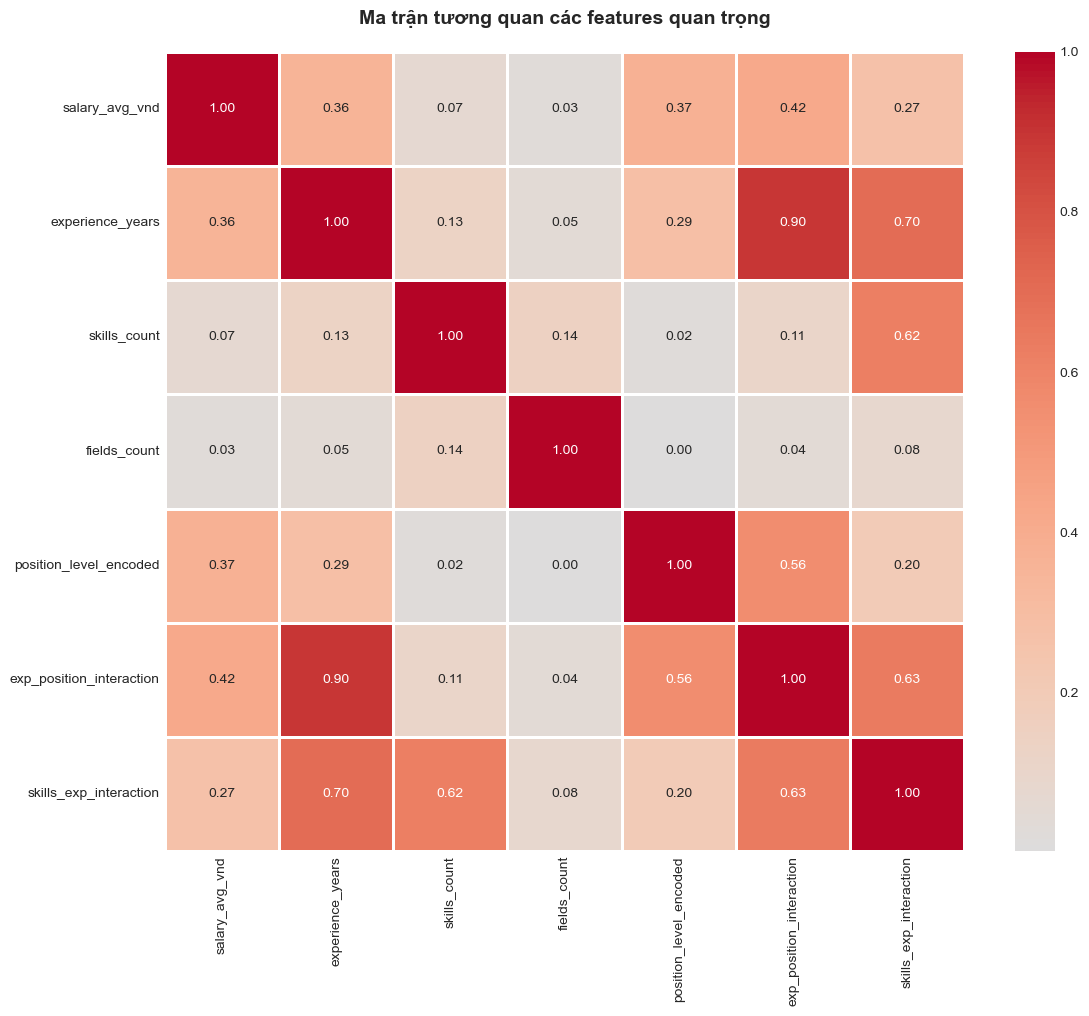

\Đã lưu ma trận tương quan features!


In [ ]:
# Correlation heatmap cho các features quan trọng
important_features = [
    'salary_avg_vnd', 'experience_years', 'skills_count', 
    'fields_count', 'position_level_encoded',
    'exp_position_interaction', 'skills_exp_interaction'
]
existing_features = [f for f in important_features if f in df.columns]

if len(existing_features) > 1:
    plt.figure(figsize=(12, 10))
    correlation = df[existing_features].corr()
    sns.heatmap(correlation, annot=True, fmt='.2f', cmap='coolwarm', 
                center=0, square=True, linewidths=1)
    plt.title('Ma trận tương quan các features quan trọng', fontsize=14, fontweight='bold', pad=20)
    plt.tight_layout()
    plt.savefig('./figures/03_feature_correlation.png', dpi=300, bbox_inches='tight')
    plt.show()
    print("\n Đã lưu ma trận tương quan features!")

# LƯU DỮ LIỆU SAU FEATURE ENGINEERING

In [192]:
df.head()

,job_title,job_type,position_level,city,experience,skills,job_fields,salary,salary_min,salary_max,unit,salary_avg_vnd,salary_category,experience_years,skills_count,has_skill_tư_vấn_bán_hàng,has_skill_không_yêu_cầu,has_skill_chăm_sóc_khách_hàng,has_skill_bán_hàng_kinh_doanh,has_skill_bán_sỉ_bán_lẻ_quản_lý_cửa_hàng,has_skill_phát_triển_thị_trường,has_skill_bán_hàng_qua_điện_thoại_(telesale),has_skill_kế_toán_tổng_hợp,has_skill_hành_chính_văn_phòng,has_skill_xây_dựng,fields_count,field_kinh_doanh,field_bán_hàng,field_chăm_sóc_khách_hàng,field_marketing,field_ngân_hàng,field_bán_hàng_-_kinh_doanh,field_chưa_phân_loại,field_kế_toán,field_tài_chính,field_kiểm_toán,position_level_encoded,city_hà_nội,city_hồ_chí_minh,city_bình_dương,city_đồng_nai,city_long_an,city_hải_phòng,city_đà_nẵng,city_hưng_yên,city_bắc_ninh,city_tây_ninh,job_type_encoded,exp_position_interaction,skills_exp_interaction,salary_range,salary_range_ratio
0,nhân viên qc ngành cơ khí,nhân viên chính thức,Nhân viên,Hồ Chí Minh,1-2 năm,"production planning staff, chuyên viên iso, th...","vận hành sản xuất, sản xuất, qc), quản lý chất...",8 tr - 11 tr vnd,8.0,11.0,VND,9.50,Thấp,1.5,9,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,3,0,1,0,0,0,0,0,0,0,0,11,4.5,13.5,3.0,0.333333
1,trưởng phòng đấu thầu,nhân viên chính thức,Trưởng nhóm,Hồ Chí Minh,5-7 năm,"trưởng phòng xây dựng, trưởng phòng đấu thầu, ...","điện, xây dựng, điện tử, điện lạnh, dầu khí, đ...",20 tr - 30 tr vnd,20.0,30.0,VND,25.00,Cao,6.0,5,0,0,0,0,0,0,0,0,0,1,6,0,0,0,0,0,0,0,0,0,0,5,0,1,0,0,0,0,0,0,0,0,11,30.0,30.0,10.0,0.476190
2,home textile designer,nhân viên chính thức,Nhân viên,Hưng Yên,5-15 năm,Không yêu cầu,"dệt may, nghệ thuật, da giày, thiết kế, mỹ thu...","800 - 1,500 usd",20.0,37.5,USD,28.75,Cao,10.0,1,0,1,0,0,0,0,0,0,0,0,8,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,1,0,0,11,30.0,10.0,17.5,0.833333
3,giám đốc kinh doanh khu vực kem dẻo thổ nhĩ kỳ...,nhân viên chính thức,Quản lý,Bình Định,2-5 năm,"sales director, giám đốc kinh doanh khu vực ke...","thực phẩm & đồ uống, bán sỉ, bán lẻ, kinh doan...",15 tr - 40 tr vnd,15.0,40.0,VND,27.50,Cao,3.5,7,0,0,0,0,0,0,0,0,0,0,5,1,1,0,0,0,0,0,0,0,0,7,0,0,0,0,0,0,0,0,0,0,11,24.5,24.5,25.0,1.562500
4,kỹ thuật viên ie,nhân viên chính thức,Nhân viên,Hà Nam,Không yêu cầu,kỹ thuật viên ie tiếng trung,"vận hành sản xuất, sản xuất",10 tr - 18 tr vnd,10.0,18.0,VND,14.00,Trung bình cao,0.0,1,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,11,0.0,0.0,8.0,0.727273


In [ ]:
# Reset index
df = df.reset_index(drop=True)

# Lưu file
output_path = '../data/processed/featured_data.csv'
df.to_csv(output_path, index=False, encoding='utf-8-sig')
print(f"Đã lưu dữ liệu vào: {output_path}")
print(f"Số dòng: {len(df):,}")
print(f"Số cột: {df.shape[1]}")

# Lưu dữ liệu đã chuẩn hóa
scaled_output_path = '../data/processed/featured_data_scaled.csv'
df_scaled.to_csv(scaled_output_path, index=False, encoding='utf-8-sig')
print(f"Đã lưu dữ liệu chuẩn hóa vào: {scaled_output_path}")

# Lưu danh sách features
feature_list = {
    'all_features': df.columns.tolist(),
    'numerical_features': numerical_features,
    'new_features': new_features,
    'target_variable': 'salary_avg_vnd',
    'target_categorical': 'salary_category'
}

import json
with open('../data/processed/feature_list.json', 'w', encoding='utf-8') as f:
    json.dump(feature_list, f, ensure_ascii=False, indent=2)
print(f"Đã lưu danh sách features vào: feature_list.json")

Đã lưu dữ liệu vào: featured_data.csv
Số dòng: 75,897
Số cột: 52
Đã lưu dữ liệu chuẩn hóa vào: featured_data_scaled.csv
Đã lưu danh sách features vào: feature_list.json
